# Importing Lib's

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# EDA

In [57]:
x, y = make_classification(n_samples= 10000, weights=[0.99],random_state= 0)
data = pd.DataFrame(x)
target = pd.Series(y)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.830360,-0.330252,-0.230543,-0.461911,0.423043,1.198150,-0.078132,0.560084,1.172555,0.456654,-0.085175,0.120845,-0.514348,0.028474,1.432700,-0.667728,0.308132,0.009550,-1.231691,-0.667728
1,-0.043999,0.220658,1.600519,0.116929,0.390064,-1.421096,0.112926,-0.184462,1.015490,1.941363,0.273527,1.762630,1.380094,-0.920554,0.209441,-0.564106,0.012611,0.376120,-2.168332,-0.631329
2,0.626718,2.100425,-0.965798,-0.128874,0.479240,2.158692,-0.268037,0.109196,0.619129,-0.316668,0.809642,-0.449486,-1.014526,1.222137,-0.817552,0.691953,-1.264811,-0.272083,-1.138393,-1.042591
3,0.618236,-2.050204,0.197231,-1.349391,0.787622,-2.372554,-0.453772,-0.307125,1.386982,-0.872126,1.484745,-0.588555,0.866822,-1.746444,0.126735,0.473620,-0.425105,-0.679803,0.292287,-0.867680
4,1.432372,0.357851,0.439499,-0.748692,-0.941226,-0.395514,-0.256896,0.272549,-1.281665,1.235855,0.462032,0.163820,-0.992406,0.635776,-0.432270,-2.038404,-0.411067,-0.404224,0.361559,-0.411946


In [58]:
data.shape

(10000, 20)

In [59]:
target.value_counts()

,count
0,9852
1,148


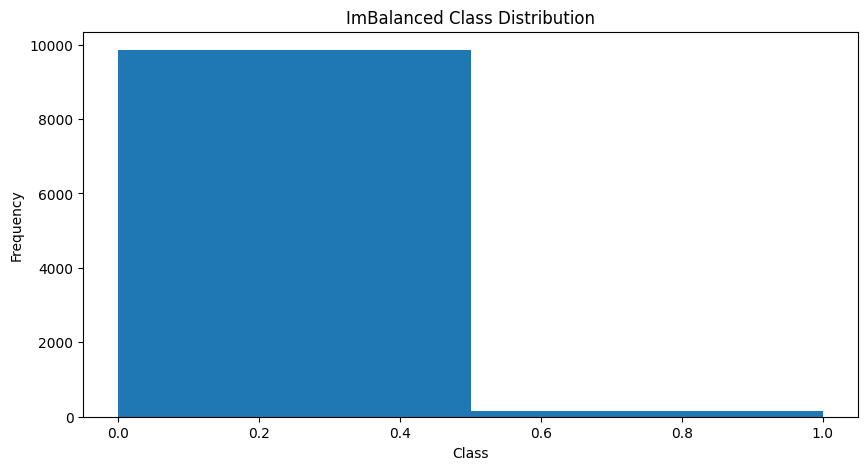

In [60]:
plt.figure(figsize= (10, 5))
plt.hist(target, bins= 2)
plt.title('ImBalanced Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [61]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size= 0.2, random_state= 42)

In [62]:
lr = LogisticRegression()
x = lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

cr = classification_report(y_test, y_pred)
print(f'Classification Report: {cr}')
ar = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {ar}')
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: {cm}')

Classification Report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1971
           1       0.00      0.00      0.00        29

    accuracy                           0.99      2000
   macro avg       0.49      0.50      0.50      2000
weighted avg       0.97      0.99      0.98      2000

Accuracy Score: 0.9855
Confusion Matrix: [[1971    0]
 [  29    0]]


# Random OverSampler

In [63]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy= 'minority')

oversample_data, oversample_target = ros.fit_resample(data, target)

In [64]:
oversample_data.shape

(19704, 20)

In [65]:
oversample_target.value_counts()

,count
0,9852
1,9852


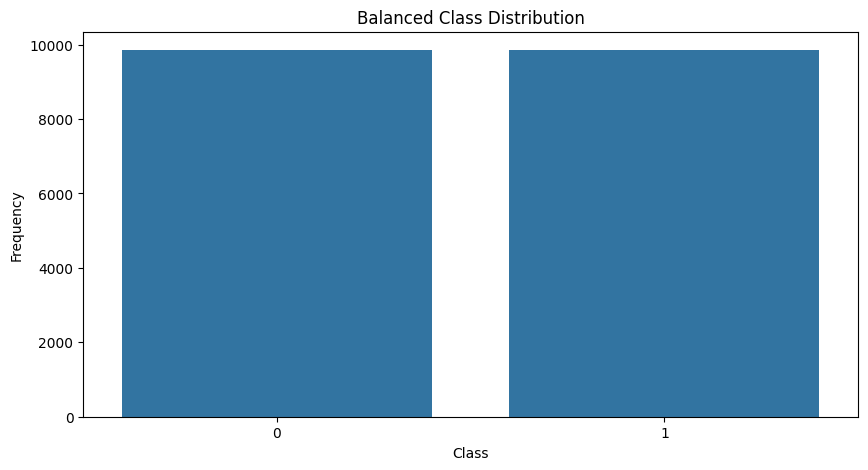

In [66]:
plt.figure(figsize= (10, 5))
sns.countplot(x=oversample_target)
plt.title('Balanced Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Model Splitting & Evaluation

In [67]:
x_train, x_test, y_train, y_test = train_test_split(oversample_data, oversample_target, test_size= 0.2, random_state= 42)

In [68]:
lr = LogisticRegression()
x = lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

cr = classification_report(y_test, y_pred)
print(f'Classification Report: \n{cr}')
ar = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {ar}')
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: {cm}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.70      0.71      0.71      1986
           1       0.70      0.69      0.70      1955

    accuracy                           0.70      3941
   macro avg       0.70      0.70      0.70      3941
weighted avg       0.70      0.70      0.70      3941

Accuracy Score: 0.7005836082212636
Confusion Matrix: [[1415  571]
 [ 609 1346]]


# Random UnderSampler

*Note: If you want your model to run properly and give good credits do one of these models (random oversampler, undersampler, smote)*

In [69]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy= 'majority')
undersample_data, undersample_target = rus.fit_resample(data, target)

In [70]:
undersample_data.shape

(296, 20)

In [71]:
undersample_target.value_counts()

,count
0,148
1,148


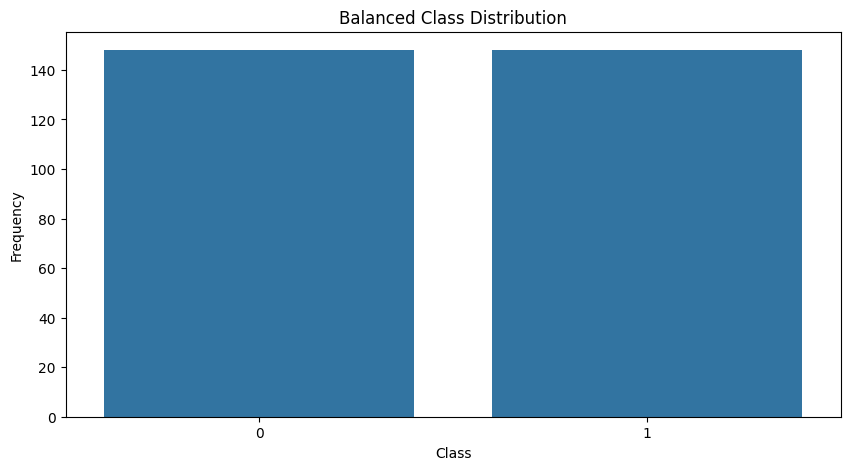

In [72]:
plt.figure(figsize= (10, 5))
sns.countplot(x= undersample_target)
plt.title('Balanced Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Model Splitting & Evaluation

In [73]:
x_train, x_test, y_train, y_test = train_test_split(undersample_data, undersample_target, test_size= 0.2, random_state= 42)

In [74]:
lr = LogisticRegression()
x = lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

cr = classification_report(y_test, y_pred)
print(f'Classification Report: \n{cr}')
ar = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {ar}')
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: {cm}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.68      0.52      0.59        29
           1       0.63      0.77      0.70        31

    accuracy                           0.65        60
   macro avg       0.66      0.65      0.64        60
weighted avg       0.66      0.65      0.64        60

Accuracy Score: 0.65
Confusion Matrix: [[15 14]
 [ 7 24]]


# SMOTE Tech

In [75]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=42)
oversample_data_smote, oversample_target_smote = smote.fit_resample(data, target)

In [76]:
print("Shape of data after SMOTE:", oversample_data_smote.shape)
print("Class distribution after SMOTE:\n", oversample_target_smote.value_counts())

Shape of data after SMOTE: (19704, 20)
Class distribution after SMOTE:
 0    9852
1    9852
Name: count, dtype: int64


# Model Splitting & Evaluation

In [78]:
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(oversample_data_smote, oversample_target_smote, test_size=0.2, random_state=42)

lr_smote = LogisticRegression()
x = lr_smote.fit(x_train_smote, y_train_smote)
y_pred_smote = lr_smote.predict(x_test_smote)

cr_smote = classification_report(y_test_smote, y_pred_smote)
print(f'Classification Report: \n{cr_smote}')
ar_smote = accuracy_score(y_test_smote, y_pred_smote)
print(f'Accuracy Score: {ar_smote}')
cm_smote = confusion_matrix(y_test_smote, y_pred_smote)
print(f'Confusion Matrix: {cm_smote}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1986
           1       0.72      0.74      0.73      1955

    accuracy                           0.73      3941
   macro avg       0.73      0.73      0.73      3941
weighted avg       0.73      0.73      0.73      3941

Accuracy Score: 0.727987820350165
Confusion Matrix: [[1426  560]
 [ 512 1443]]


# Best Model

In [82]:
# Create a dictionary to store accuracy scores
accuracy_scores = {
    'Random Over-sampling': accuracy_score(y_test, y_pred),
    'Random Under-sampling': accuracy_score(y_test, y_pred),
    'SMOTE': accuracy_score(y_test_smote, y_pred_smote)
}
accuracy_scores = {
    'Random Over-sampling': 0.7005836082212636,
    'Random Under-sampling': 0.65,
    'SMOTE' :  0.727987820350165
}


best_technique = max(accuracy_scores, key=accuracy_scores.get)
print(f"The best performing resampling technique is: {best_technique}")

The best performing resampling technique is: SMOTE
